In [1]:
pip install nixtla

In [2]:
from nixtla import NixtlaClient

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-wpuxSsYvu5Eg6RWc8Hy5XgTGP49qdgsJXBSa7KDwn5aJF29BbK3StWnIM9p9KALGIQLqu4Msjng819nA'
)

In [4]:
nixtla_client.validate_api_key()

True

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/san francisco.csv')
df.head()

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,0.83,0.84,0.90,0.89
1,2020-01-01 00:30:00,2.57,2.53,2.54,2.68
2,2020-01-01 01:00:00,2.94,2.66,2.44,3.32
3,2020-01-01 01:30:00,2.13,1.85,1.62,2.44
4,2020-01-01 02:00:00,4.27,3.96,3.63,4.52


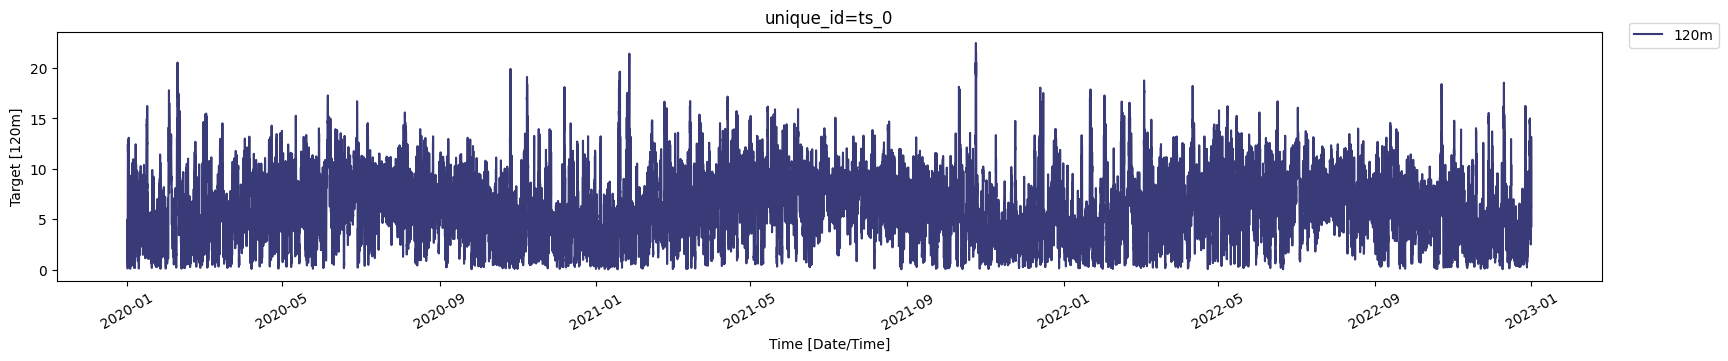

In [7]:
nixtla_client.plot(df, time_col='Date/Time', target_col='120m')


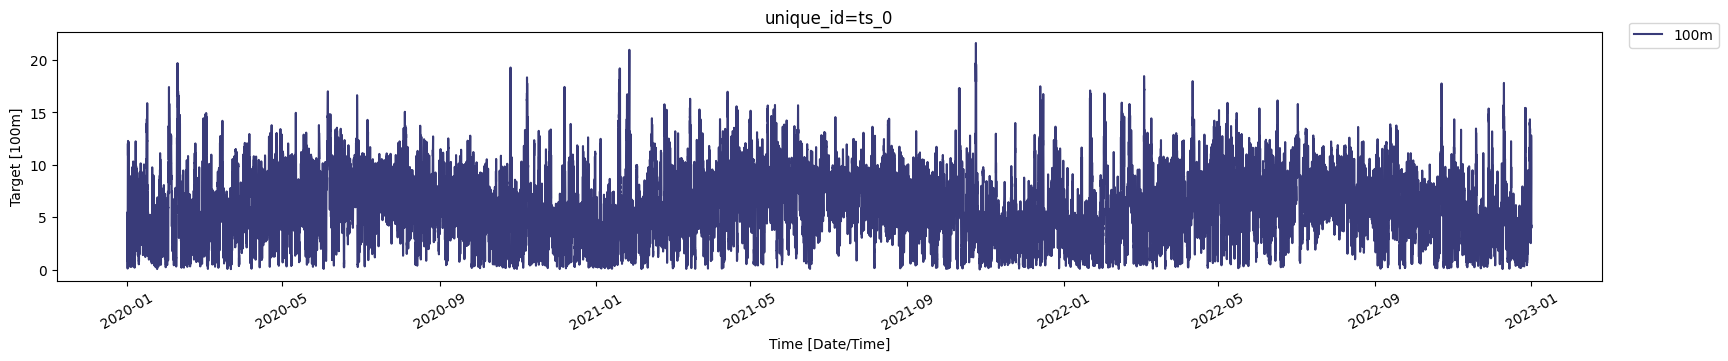

In [8]:
nixtla_client.plot(df, time_col='Date/Time', target_col='100m')


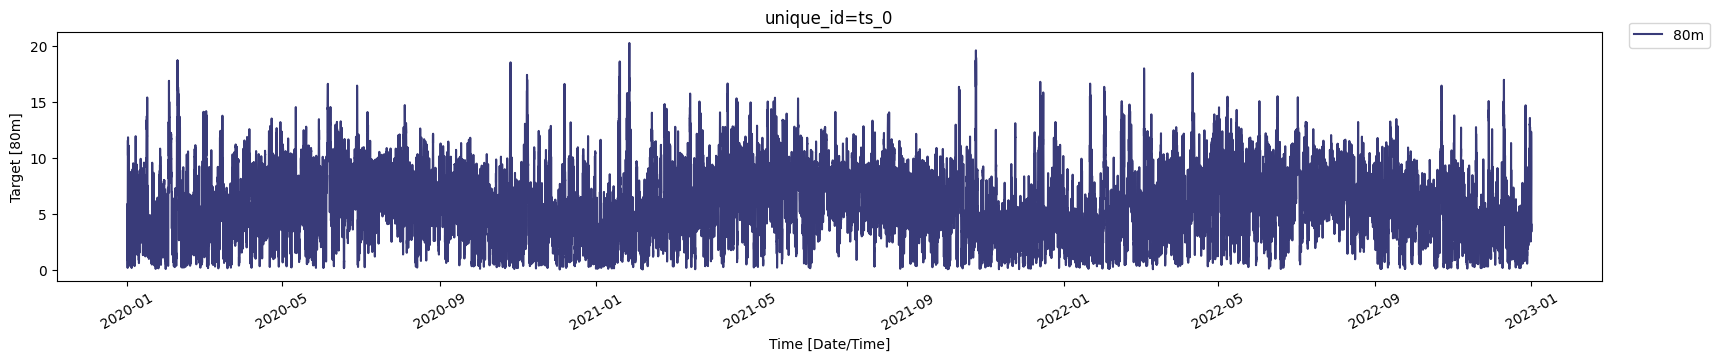

In [9]:
nixtla_client.plot(df, time_col='Date/Time', target_col='80m')


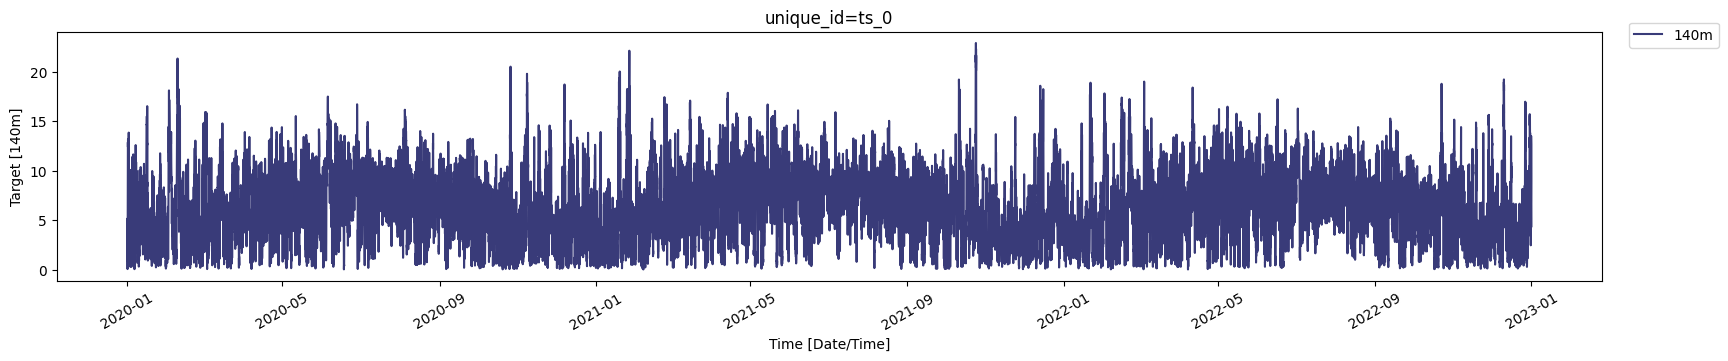

In [10]:
nixtla_client.plot(df, time_col='Date/Time', target_col='140m')


In [11]:
df.head(10)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,0.83,0.84,0.90,0.89
1,2020-01-01 00:30:00,2.57,2.53,2.54,2.68
2,2020-01-01 01:00:00,2.94,2.66,2.44,3.32
3,2020-01-01 01:30:00,2.13,1.85,1.62,2.44
4,2020-01-01 02:00:00,4.27,3.96,3.63,4.52
5,2020-01-01 02:30:00,5.46,4.96,4.64,5.88
6,2020-01-01 03:00:00,4.13,4.02,3.98,4.69
7,2020-01-01 03:30:00,3.09,3.48,3.81,2.66
8,2020-01-01 04:00:00,2.33,2.77,3.19,1.84
9,2020-01-01 04:30:00,2.99,3.69,4.34,2.25


In [12]:
dti = pd.date_range("2014-01-01", periods=3, freq="15min")
dti

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00'],
              dtype='datetime64[ns]', freq='15min')

In [13]:
data = df

In [14]:
data.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
data.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(data) * 0.95)
train_data = data[:split_index]
test_data = data[split_index:]

In [15]:
train_data

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,0.83,0.84,0.90,0.89
2020-01-01 00:30:00,2.57,2.53,2.54,2.68
2020-01-01 01:00:00,2.94,2.66,2.44,3.32
2020-01-01 01:30:00,2.13,1.85,1.62,2.44
2020-01-01 02:00:00,4.27,3.96,3.63,4.52
...,...,...,...,...
2022-11-07 02:00:00,8.81,9.45,10.04,8.11
2022-11-07 02:30:00,9.87,10.30,10.69,9.36
2022-11-07 03:00:00,7.90,8.26,8.50,7.28


In [16]:
fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['100m', '140m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


In [17]:
fcst_df.head()

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2022-11-07 04:30:00,5.179511,6.674673,3.684348
1,2022-11-07 05:00:00,5.210283,7.869236,2.551330
2,2022-11-07 05:30:00,5.339390,8.933813,1.744968
3,2022-11-07 06:00:00,5.423746,9.333284,1.514208
4,2022-11-07 06:30:00,5.382567,9.565487,1.199648


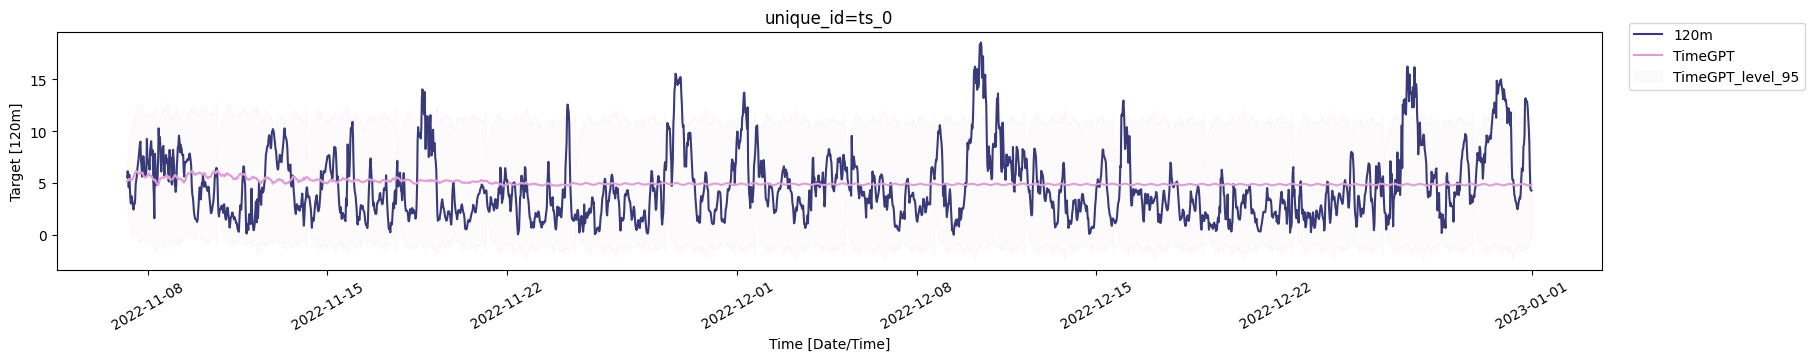

In [18]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

In [6]:
df1 = pd.read_csv('/content/san francisco.csv')
df1.head()

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,0.83,0.84,0.90,0.89
1,2020-01-01 00:30:00,2.57,2.53,2.54,2.68
2,2020-01-01 01:00:00,2.94,2.66,2.44,3.32
3,2020-01-01 01:30:00,2.13,1.85,1.62,2.44
4,2020-01-01 02:00:00,4.27,3.96,3.63,4.52


In [7]:
df1.head(1)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,0.83,0.84,0.9,0.89


In [8]:
df1.head(-1)

,Date/Time,100m,120m,140m,80m
0,2020-01-01 00:00:00,0.83,0.84,0.90,0.89
1,2020-01-01 00:30:00,2.57,2.53,2.54,2.68
2,2020-01-01 01:00:00,2.94,2.66,2.44,3.32
3,2020-01-01 01:30:00,2.13,1.85,1.62,2.44
4,2020-01-01 02:00:00,4.27,3.96,3.63,4.52
...,...,...,...,...,...
52602,2022-12-31 21:00:00,9.68,10.32,10.84,8.87
52603,2022-12-31 21:30:00,8.19,8.94,9.53,7.25
52604,2022-12-31 22:00:00,5.44,6.27,6.95,4.50
52605,2022-12-31 22:30:00,3.98,4.50,4.98,3.40


In [9]:
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

# Set the 'Date/Time' column as the index
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Resample the data to one-day intervals by taking the mean
df1 = df1.resample('H').mean()

<ipython-input-9-03367d1038ab>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1 = df1.resample('H').mean()


In [10]:
df1.head(10)

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,1.700,1.685,1.720,1.785
2020-01-01 01:00:00,2.535,2.255,2.030,2.880
2020-01-01 02:00:00,4.865,4.460,4.135,5.200
2020-01-01 03:00:00,3.610,3.750,3.895,3.675
2020-01-01 04:00:00,2.660,3.230,3.765,2.045
2020-01-01 05:00:00,3.690,3.950,4.170,3.370
2020-01-01 06:00:00,3.705,4.010,4.305,3.375
2020-01-01 07:00:00,0.860,0.845,0.840,0.910
2020-01-01 08:00:00,1.015,1.110,1.185,0.985


In [11]:
df1 = df1.reset_index()

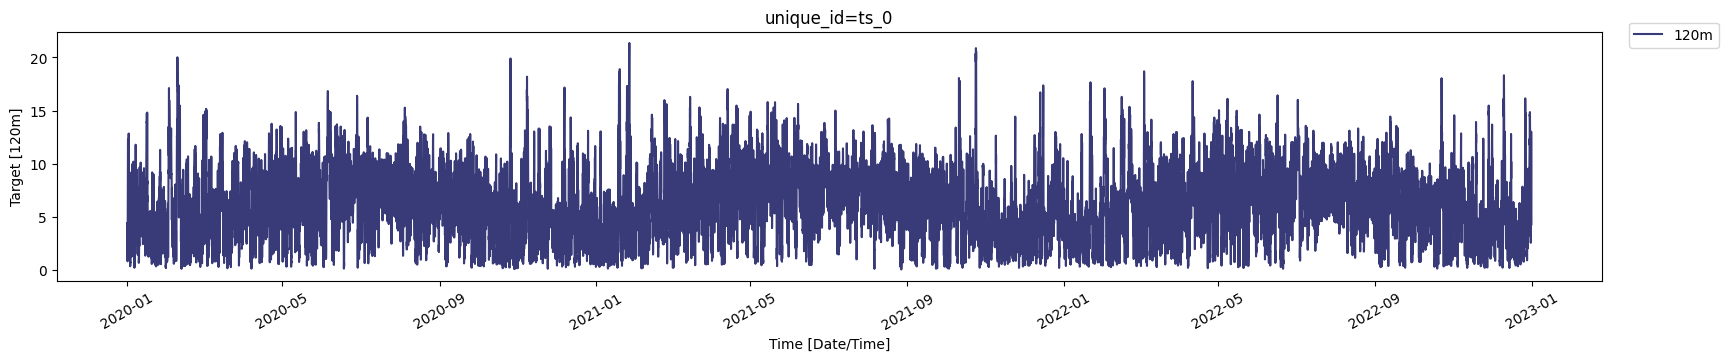

In [12]:
nixtla_client.plot(df1, time_col='Date/Time', target_col='120m')


In [13]:
df1.set_index('Date/Time', inplace=True)

# Sort the data by the datetime index
df1.sort_index(inplace=True)

# Split the data into training (80%) and testing (20%)
split_index = int(len(df1) * 0.8)
train_data = df1[:split_index]
test_data = df1[split_index:]

In [14]:

train_data

,100m,120m,140m,80m
Date/Time,,,,
2020-01-01 00:00:00,1.700,1.685,1.720,1.785
2020-01-01 01:00:00,2.535,2.255,2.030,2.880
2020-01-01 02:00:00,4.865,4.460,4.135,5.200
2020-01-01 03:00:00,3.610,3.750,3.895,3.675
2020-01-01 04:00:00,2.660,3.230,3.765,2.045
...,...,...,...,...
2022-05-26 14:00:00,10.580,10.815,11.010,10.275
2022-05-26 15:00:00,9.320,9.520,9.680,9.065
2022-05-26 16:00:00,10.000,10.250,10.460,9.695


In [15]:
import time
start_time = time.time()

fcst_df = nixtla_client.forecast(
    df=train_data.reset_index(),  # Reset the index to make 'Date/Time' a column again,
    h=len(test_data),
    level=[95],
    finetune_steps=5,
    finetune_loss='rmse',
    finetune_depth=2,
    model='timegpt-1-long-horizon',
    time_col='Date/Time',
    target_col='120m'
)
end_time = time.time()
print(f'Training Time: {end_time - start_time:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/nixtla/nixtla_client.py:383: UserWarning: `df` contains the following exogenous features: ['100m', '140m', '80m'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


Training Time: 4.23 seconds


In [16]:
fcst_df.head(10)

,Date/Time,TimeGPT,TimeGPT-hi-95,TimeGPT-lo-95
0,2022-05-26 19:00:00,10.862737,13.240513,8.484961
1,2022-05-26 20:00:00,10.691823,14.228971,7.154675
2,2022-05-26 21:00:00,9.702590,14.299220,5.105960
3,2022-05-26 22:00:00,8.901885,14.004768,3.799002
4,2022-05-26 23:00:00,7.977463,12.944855,3.010072
5,2022-05-27 00:00:00,7.196272,12.045029,2.347516
6,2022-05-27 01:00:00,6.664805,12.206177,1.123434
7,2022-05-27 02:00:00,6.693835,11.672378,1.715292
8,2022-05-27 03:00:00,6.477432,11.544337,1.410527
9,2022-05-27 04:00:00,6.188223,11.480668,0.895778


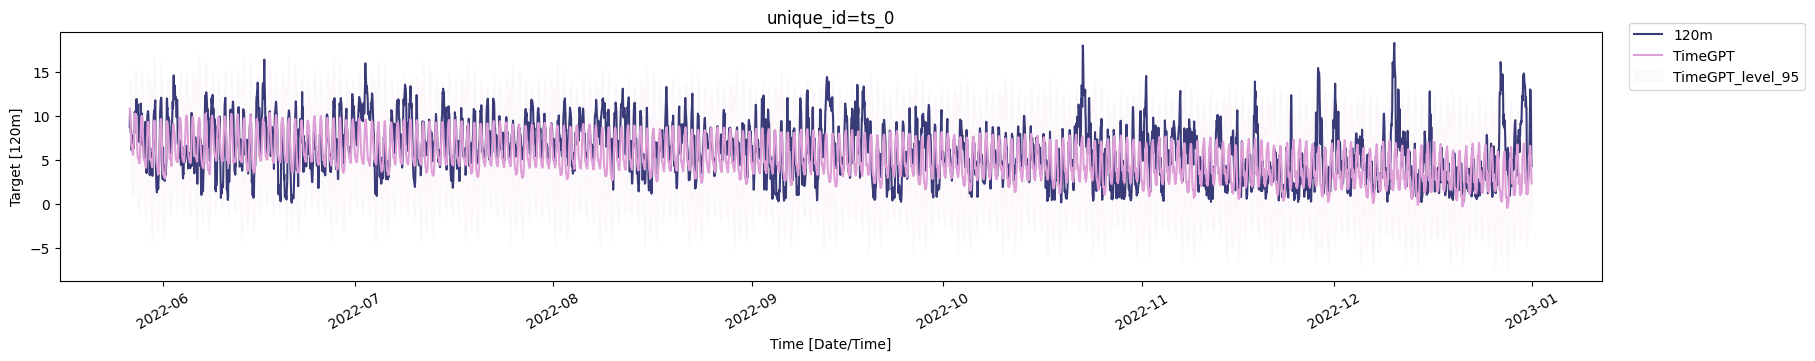

In [17]:
nixtla_client.plot(test_data.reset_index(), fcst_df, models=['TimeGPT'], level=[95], time_col='Date/Time', target_col='120m')

In [18]:
from nixtla import NixtlaClient

from utilsforecast.losses import mse,mae,rmse

In [19]:
test_data = test_data.reset_index()

In [20]:
test_data['unique_id'] = 'a'

In [21]:
test = test_data.copy()

test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [22]:
test

,Date/Time,100m,120m,140m,80m,unique_id,TimeGPT
0,2022-05-26 19:00:00,8.215,8.815,9.445,7.685,a,10.862737
1,2022-05-26 20:00:00,10.170,10.550,10.925,9.760,a,10.691823
2,2022-05-26 21:00:00,8.765,9.115,9.450,8.365,a,9.702590
3,2022-05-26 22:00:00,8.030,8.425,8.795,7.600,a,8.901885
4,2022-05-26 23:00:00,7.705,8.130,8.560,7.270,a,7.977463
...,...,...,...,...,...,...,...
5256,2022-12-31 19:00:00,12.350,12.870,13.330,11.715,a,6.252375
5257,2022-12-31 20:00:00,11.250,11.800,12.250,10.555,a,5.531163
5258,2022-12-31 21:00:00,8.935,9.630,10.185,8.060,a,4.398870
5259,2022-12-31 22:00:00,4.710,5.385,5.965,3.950,a,2.877559


In [23]:
evaluation = rmse(test, models=['TimeGPT'],id_col='unique_id', target_col='120m')

print(evaluation)

  unique_id   TimeGPT
0         a  2.923687


In [24]:
# Add the prediction intervals to the test dataframe
test['TimeGPT-hi-95'] = fcst_df['TimeGPT-hi-95'].values
test['TimeGPT-lo-95'] = fcst_df['TimeGPT-lo-95'].values

# Calculate PICP: Proportion of actual values within the prediction interval
test['Within_Interval'] = (test['120m'] >= test['TimeGPT-lo-95']) & (test['120m'] <= test['TimeGPT-hi-95'])
PICP = test['Within_Interval'].mean()

# Calculate MPIW: Mean width of the prediction intervals
test['Interval_Width'] = test['TimeGPT-hi-95'] - test['TimeGPT-lo-95']
MPIW = test['Interval_Width'].mean()

# Print the results
print(f"PICP: {PICP}")
print(f"MPIW: {MPIW}")


PICP: 0.93575365900019
MPIW: 11.235452185676182
